# Quantitative Structure-Activity Relationship of Fish Toxicity

This project aims to analyze the quantitative structure-activity relationship to predict acute aquatic toxicity towards the fish Pimephales promelas (fathead minnow) on a set of 908 chemicals. The method used are the Multiple Linear Regression (MLR) and the k-Nearest Neighbor (KNN).

***
Variables used are:

* CIC0
* SM1_Dz(Z)
* GATS1i
* NdsCH
* NdssC
* MLOGP
* Target variables, LC50 \[-LOG(mol/L)]

***

Dataset source : https://archive.ics.uci.edu/ml/datasets/QSAR+fish+toxicity

Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
plt.style.use('fivethirtyeight')

Load the dataset

In [2]:
dataset = pd.read_csv('dataset/qsar_fish_toxicity.csv')
dataset.head(10)

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
5,3.222,0.331,2.177,0,0,0.706,1.819
6,3.179,0.000,1.063,0,0,2.942,3.947
7,3.000,0.000,0.938,1,0,2.851,3.513
8,2.620,0.499,0.990,0,0,2.942,4.402
9,2.834,0.134,0.950,0,0,1.591,3.021


Generate descriptive statistics of the dataset

In [3]:
dataset.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50 [-LOG(mol/L)]
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898129,0.628468,1.293591,0.229075,0.485683,2.109285,4.064431
std,0.756088,0.428459,0.394303,0.605335,0.861279,1.433181,1.455698
min,0.667000,0.000000,0.396000,0.000000,0.000000,-2.884000,0.053000
25%,2.347000,0.223000,0.950750,0.000000,0.000000,1.209000,3.151750
50%,2.934000,0.570000,1.240500,0.000000,0.000000,2.127000,3.987500
75%,3.407000,0.892750,1.562250,0.000000,1.000000,3.105000,4.907500
max,5.926000,2.171000,2.920000,4.000000,6.000000,6.515000,9.612000


Calculate the correlation of each columns with the LC50

In [4]:
correlation = dataset.corr(method = 'pearson')['LC50 [-LOG(mol/L)]'].sort_values(ascending=False)
correlation

LC50 [-LOG(mol/L)]    1.000000
MLOGP                 0.651664
SM1_Dz(Z)             0.410893
CIC0                  0.291854
NdssC                 0.172390
NdsCH                 0.172004
GATS1i               -0.397965
Name: LC50 [-LOG(mol/L)], dtype: float64

From the correlation test to the LC50 that has been done above, it is known that MLOGP has the highest correlation of 0.652 and GATS1i has the lowest correlation of -0.398.

Split the dependent and independent variables in the dataset

In [5]:
x = dataset.iloc[:, 0:6]
y = dataset.iloc[:, 6:7]

Scales the independent variables

In [6]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

Split the dataset into training and testing set

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

Create the linear model using the MLR

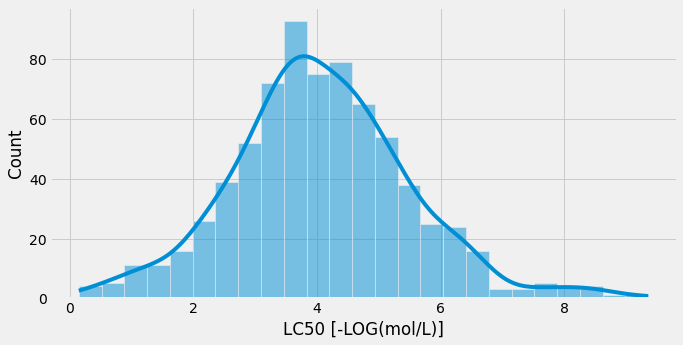

In [8]:
figure = plt.figure(figsize=[10,5])
sns.histplot(y_train, x='LC50 [-LOG(mol/L)]', kde=True)
plt.show()

In [9]:
mlr = LinearRegression().fit(x_train,y_train)
mlr_train_pred = mlr.predict(x_train)
mlr_test_pred = mlr.predict(x_test)

mlr_rsq = mlr.score(x_train,y_train)
mlr_test_rsq = mlr.score(x_test,y_test)
mlr_rmse = np.sqrt(mean_squared_error(y_train, mlr_train_pred))
mlr_test_rmse = np.sqrt(mean_squared_error(y_test, mlr_test_pred))

Create the nonlinear model using the KNN

In [10]:
knn_result = []
for n in range (2,9):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(x_train, y_train)
    knn_result.append(knn.score(x_train, y_train))

best_n = knn_result.index(max(knn_result)) + 2

print('The best k value : {} with R-Squared : {}'.format(best_n, max(knn_result)))

The best k value : 2 with R-Squared : 0.8653764816143904


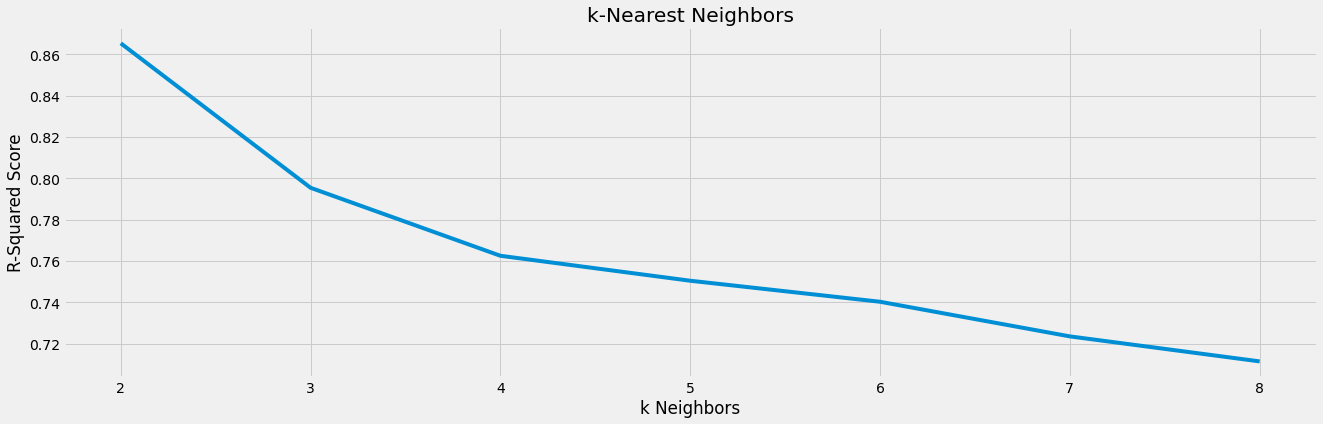

In [11]:
plt.figure(figsize=(20,6))
plt.plot([i for i in range(2, 9)], knn_result)
plt.xlabel('k Neighbors')
plt.ylabel('R-Squared Score')
plt.title('k-Nearest Neighbors')
plt.show()

In [12]:
knn = KNeighborsRegressor(n_neighbors=2).fit(x_train,y_train)
knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)

knn_rsq = knn.score(x_train,y_train)
knn_test_rsq = knn.score(x_test,y_test)
knn_rmse = np.sqrt(mean_squared_error(y_train, knn_train_pred))
knn_test_rmse = np.sqrt(mean_squared_error(y_test, knn_test_pred))

Model evaluation using theR2 and the RMSE metrics

In [13]:
print('MLR R-Squared : {:.3f} for the training set, and {:.3f} for the testing set'.format(mlr_rsq, mlr_test_rsq))
print('MLR RMSE : {:.3f} for the training set, and {:.3f} for the testing set\n'.format(mlr_rmse, mlr_test_rmse))
print('KNN R-Squared : {:.3f} for the training set, and {:.3f} for the testing set'.format(knn_rsq, knn_test_rsq))
print('KNN RMSE : {:.3f} for the training set, and {:.3f} for the testing set'.format(knn_rmse, knn_test_rmse))

MLR R-Squared : 0.580 for the training set, and 0.564 for the testing set
MLR RMSE : 0.926 for the training set, and 1.027 for the testing set

KNN R-Squared : 0.865 for the training set, and 0.528 for the testing set
KNN RMSE : 0.524 for the training set, and 1.068 for the testing set


From the results of the evaluation that has been done, it is known that the KNN model can provide better predictive results than the MLR method. This is proven by the higher R-Squared yield and lower RMSE, compared to that obtained by the MLR method.

Visualize the regression plot and the residual plot of the KNN method

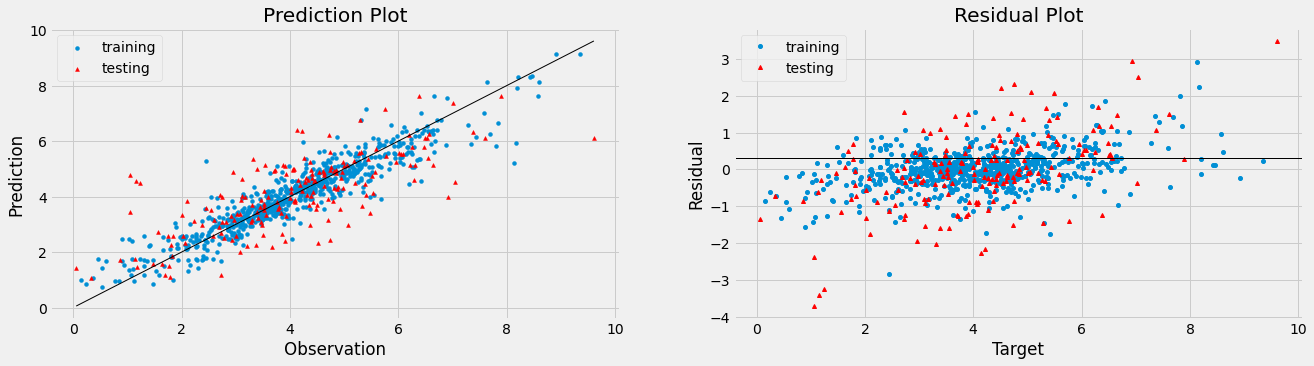

In [14]:
residual_train = y_train - knn_train_pred
residual_test = y_test - knn_test_pred

fig=plt.figure(figsize=(20,5))

ax1=plt.subplot(1,2,1)
ax1.scatter(y_train, knn_train_pred, s=15, label='training')
ax1.scatter(y_test, knn_test_pred, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Observation')
ax1.set_ylabel('Prediction')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('Target')
ax2.set_ylabel('Residual')

plt.show()

Save the model

In [15]:
filename = 'dataset/qsar_model.sav'
pickle.dump(knn, open(filename, 'wb'))